In [1]:
# :: 6th March 2023 :: @21:45

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

nltk.download("book");

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/kalamari/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    |

In [3]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'

In [4]:
df = pd.read_csv('datasets/linkedin-jobs-machine-learning-uk-1936_03082023.csv')

In [5]:
df = df.dropna()

In [6]:
# set palette color
plt.style.use(PLOT_PALETTE)
%matplotlib inline

In [7]:
df = pd.read_csv('datasets/linkedin-jobs-machine-learning-uk-2055_03062023.csv')

df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Junior Data Scientist,Oscar Technology,Role - Junior Data ScientistLocation - Manches...,onsite,NaN,"Manchester, England, United Kingdom","[{'Seniority level': 'Entry level'}, {'Employm...",2023-02-28,https://uk.linkedin.com/jobs/view/junior-data-...
1,Graduate Machine Learning / Data Scientist,Cambridge Consultants,IntroductionWe are looking for talented mathem...,onsite,NaN,"Cambridge, England, United Kingdom","[{'Seniority level': 'Entry level'}, {'Employm...",2023-02-27,https://uk.linkedin.com/jobs/view/graduate-mac...
2,Machine Learning Engineer,orbit,🚀Machine Learning Engineer🎥 Digital Media Serv...,onsite,NaN,"Leeds, England, United Kingdom","[{'Seniority level': 'Not Applicable'}, {'Empl...",2023-02-07,https://uk.linkedin.com/jobs/view/machine-lear...
3,Deep Learning Engineer,Predictiva,"""Please note that we are currently unable to p...",onsite,NaN,"Edinburgh, Scotland, United Kingdom",[{'Employment type': 'Full-time'}],2023-03-06,https://uk.linkedin.com/jobs/view/deep-learnin...
4,Data Scientist,Peak,The OpportunityOur mission is to change the wa...,onsite,NaN,"Manchester, England, United Kingdom","[{'Seniority level': 'Entry level'}, {'Employm...",2023-03-01,https://uk.linkedin.com/jobs/view/data-scienti...


In [8]:
import ast 

# Define function to extract key-value pairs from criteria column
def extract_criteria(criteria):
    criteria_dict = {}
    # Convert string to list of dictionaries using ast.literal_eval()
    criteria_list = ast.literal_eval(criteria)
    # Loop through each dictionary in the list
    for d in criteria_list:
        # Loop through each key-value pair in the dictionary
        for key, value in d.items():
            # Add key-value pair to criteria_dict
            criteria_dict[key] = value
    return criteria_dict

# Apply function to 'criteria' column
df_criteria = df['criteria'].apply(extract_criteria).apply(pd.Series)

# Concatenate criteria DataFrame with original DataFrame
df = pd.concat([df.drop('criteria', axis=1), df_criteria], axis=1)

# Display the result
df

/tmp/ipykernel_32373/1755144796.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_criteria = df['criteria'].apply(extract_criteria).apply(pd.Series)
/tmp/ipykernel_32373/1755144796.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_criteria = df['criteria'].apply(extract_criteria).apply(pd.Series)
/tmp/ipykernel_32373/1755144796.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_criteria = df['criteria'].apply(extract_criteria).apply(pd.Series)
/tmp/ipykernel_32373/1755144796.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silenc

,title,company,description,onsite_remote,salary,location,posted_date,link,Seniority level,Employment type,Job function,Industries
0,Junior Data Scientist,Oscar Technology,Role - Junior Data ScientistLocation - Manches...,onsite,NaN,"Manchester, England, United Kingdom",2023-02-28,https://uk.linkedin.com/jobs/view/junior-data-...,Entry level,Full-time,Engineering and Information Technology,Staffing and Recruiting
1,Graduate Machine Learning / Data Scientist,Cambridge Consultants,IntroductionWe are looking for talented mathem...,onsite,NaN,"Cambridge, England, United Kingdom",2023-02-27,https://uk.linkedin.com/jobs/view/graduate-mac...,Entry level,Full-time,Engineering and Information Technology,Design Services
2,Machine Learning Engineer,orbit,🚀Machine Learning Engineer🎥 Digital Media Serv...,onsite,NaN,"Leeds, England, United Kingdom",2023-02-07,https://uk.linkedin.com/jobs/view/machine-lear...,Not Applicable,Full-time,Information Technology,"Technology, Information and Internet"
3,Deep Learning Engineer,Predictiva,"""Please note that we are currently unable to p...",onsite,NaN,"Edinburgh, Scotland, United Kingdom",2023-03-06,https://uk.linkedin.com/jobs/view/deep-learnin...,NaN,Full-time,NaN,NaN
4,Data Scientist,Peak,The OpportunityOur mission is to change the wa...,onsite,NaN,"Manchester, England, United Kingdom",2023-03-01,https://uk.linkedin.com/jobs/view/data-scienti...,Entry level,Full-time,Engineering and Information Technology,"Technology, Information and Internet"
...,...,...,...,...,...,...,...,...,...,...,...,...
1261,Data Analyst,Media by Kantar,"Kantar is the world’s leading data, insights a...",hybrid,NaN,"England, United Kingdom",2023-02-28,https://uk.linkedin.com/jobs/view/data-analyst...,Mid-Senior level,Full-time,"Consulting, Research, and Marketing",Market Research
1262,Machine Learning Engineer,CellVoyant,Who are we?CellVoyant is a biotechnology compa...,hybrid,NaN,"Bristol, England, United Kingdom",2022-11-10,https://uk.linkedin.com/jobs/view/machine-lear...,Entry level,Full-time,Engineering and Information Technology,Biotechnology
1263,Data Scientist,Peak,The Opportunity Our mission is to change the w...,hybrid,NaN,"Manchester Area, United Kingdom",2023-03-02,https://uk.linkedin.com/jobs/view/data-scienti...,Mid-Senior level,Full-time,"Information Technology, Other, and Engineering",IT Services and IT Consulting and Software Dev...
1264,Data and Insights Analyst,PHMG,Role: Data and Insights AnalystLocation: Old T...,hybrid,NaN,"Manchester, England, United Kingdom",2023-03-01,https://uk.linkedin.com/jobs/view/data-and-ins...,Entry level,Full-time,"Research, Analyst, and Information Technology","Advertising Services, Musicians, and Telecommu..."


In [9]:
import multiprocessing

def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    return ' '.join(txt)

# define the number of processes to use
num_processes = multiprocessing.cpu_count()

# create a pool of worker processes
pool = multiprocessing.Pool(processes=num_processes)

# apply the preprocess function to each element of the 'description' column
df['description'] = pool.map(preprocess, df['description'])

# close the pool to free up resources
pool.close()
pool.join()

In [10]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['description'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('data', 3825), ('learning', 2053), ('team', 1619), ('experience', 1575), ('work', 1553), ('machine', 1473), ('working', 1201), ('business', 953), ('ai', 939), ('skills', 912), ('science', 898), ('role', 846), ('world', 828), ('models', 788), ('company', 785), ('python', 758), ('nan', 701), ('new', 650), ('help', 635), ('using', 626), ('development', 572), ('looking', 564), ('computer', 535), ('ml', 528), ('knowledge', 520), ('part', 485), ('opportunity', 481), ('technical', 481), ('build', 477), ('us', 473), ('best', 470), ('including', 469), ('people', 468), ('across', 444), ('technology', 440), ('understanding', 435), ('one', 435), ('please', 423), ('environment', 419), ('deep', 419), ('ability', 417), ('develop', 406), ('scientist', 403), ('solutions', 375), ('strong', 374), ('research', 372), ('flexible', 359), ('problems', 355), ('algorithms', 355), ('clients', 354)]


Stored variables and their in-db values:


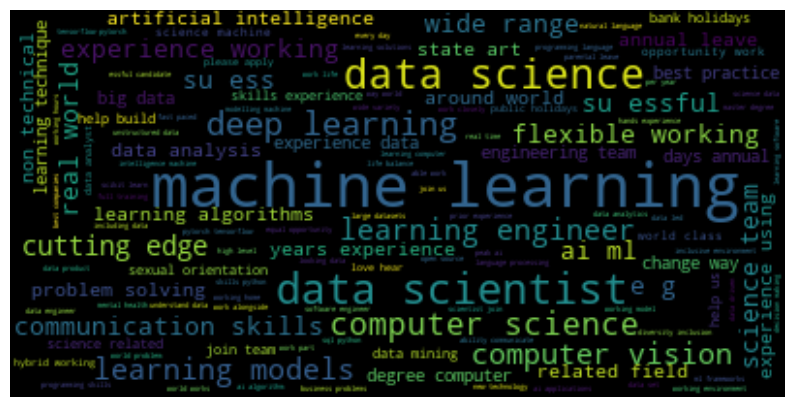

In [11]:
%store

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# Define function to normalize job titles
def normalize_job_title(title):
    # Convert title to lowercase
    title = title.lower()
    # Remove punctuation
    title = title.replace(',', '').replace('.', '').replace(':', '').replace('(', '').replace(')', '').replace('-', ' ')
    # Tokenize title into words
    words = word_tokenize(title)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Extract keywords from words
    keywords = []
    for word in words:
        if word in ['scientist', 'engineer', 'manager', 'analyst']:
            keywords.append(word)
    # Join keywords into a string
    return ' '.join(keywords)

# Apply function to 'titles' column where the job title contains "machine learning" or "data scientist"
df.loc[df['title'].str.contains('machine learning|data scientist', case=False), 'normalized_job_title'] = df['title'].apply(normalize_job_title)

# Display the result
df

,title,company,description,onsite_remote,salary,location,posted_date,link,Seniority level,Employment type,Job function,Industries,normalized_job_title
0,Junior Data Scientist,Oscar Technology,role junior data scientistlocation manchester ...,onsite,NaN,"Manchester, England, United Kingdom",2023-02-28,https://uk.linkedin.com/jobs/view/junior-data-...,Entry level,Full-time,Engineering and Information Technology,Staffing and Recruiting,scientist
1,Graduate Machine Learning / Data Scientist,Cambridge Consultants,introductionwe looking talented mathematicians...,onsite,NaN,"Cambridge, England, United Kingdom",2023-02-27,https://uk.linkedin.com/jobs/view/graduate-mac...,Entry level,Full-time,Engineering and Information Technology,Design Services,scientist
2,Machine Learning Engineer,orbit,machine learning engineer digital media servic...,onsite,NaN,"Leeds, England, United Kingdom",2023-02-07,https://uk.linkedin.com/jobs/view/machine-lear...,Not Applicable,Full-time,Information Technology,"Technology, Information and Internet",engineer
3,Deep Learning Engineer,Predictiva,please note currently unable provide visa spon...,onsite,NaN,"Edinburgh, Scotland, United Kingdom",2023-03-06,https://uk.linkedin.com/jobs/view/deep-learnin...,NaN,Full-time,NaN,NaN,NaN
4,Data Scientist,Peak,opportunityour mission change way world works ...,onsite,NaN,"Manchester, England, United Kingdom",2023-03-01,https://uk.linkedin.com/jobs/view/data-scienti...,Entry level,Full-time,Engineering and Information Technology,"Technology, Information and Internet",scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,Data Analyst,Media by Kantar,kantar world leading data insights consulting ...,hybrid,NaN,"England, United Kingdom",2023-02-28,https://uk.linkedin.com/jobs/view/data-analyst...,Mid-Senior level,Full-time,"Consulting, Research, and Marketing",Market Research,NaN
1262,Machine Learning Engineer,CellVoyant,cellvoyant biotechnology company predicts stem...,hybrid,NaN,"Bristol, England, United Kingdom",2022-11-10,https://uk.linkedin.com/jobs/view/machine-lear...,Entry level,Full-time,Engineering and Information Technology,Biotechnology,engineer
1263,Data Scientist,Peak,opportunity mission change way world works dem...,hybrid,NaN,"Manchester Area, United Kingdom",2023-03-02,https://uk.linkedin.com/jobs/view/data-scienti...,Mid-Senior level,Full-time,"Information Technology, Other, and Engineering",IT Services and IT Consulting and Software Dev...,scientist
1264,Data and Insights Analyst,PHMG,role data insights analystlocation old traffor...,hybrid,NaN,"Manchester, England, United Kingdom",2023-03-01,https://uk.linkedin.com/jobs/view/data-and-ins...,Entry level,Full-time,"Research, Analyst, and Information Technology","Advertising Services, Musicians, and Telecommu...",NaN


In [13]:
# create list of all categories
categories = np.sort(df['title'].unique())
categories

array(['AI Data Scientist - Contract or Perm',
       'AI/ML - Intern (Private Federated Learning - Machine Learning Engineer), MLPT',
       'AI/ML Engineer', 'AI/ML Internship',
       'Analyst/Data Scientist (Financial)',
       'Analytics & Data Science Curriculum Specialist',
       'Applied Data Scientist', 'Applied Machine Learning Engineer',
       'Artificial Intelligence / Machine Learning Engineer - Autonomous',
       'Bioinformatician (Remote - Nextflow Developer)',
       'Bioinformatician (Remote - WDL Developer)',
       'Computer Vision Engineer',
       'Computer Vision Research Engineer - Deep Learning',
       'Data & AI Consultant', 'Data Analyst', 'Data Analyst - Marketing',
       'Data Analyst - Remote - Up to GBP38k', 'Data Engineer',
       'Data Engineer (Machine Learning)',
       'Data Engineers - Leeds/York/Remote - £60-95k',
       'Data Science Manager', 'Data Scientist',
       'Data Scientist (Graduate Role)',
       'Data Scientist (Python / SQL) – Fi

In [14]:
# create new df for corpus and category
df_categories = [df[df['title'] == category].loc[:, ['description', 'title']] for category in categories]
df_categories

[                                           description  \
 116  join leading dex company ai ml focused data sc...   
 432  join leading dex company ai ml focused data sc...   
 454  join leading dex company ai ml focused data sc...   
 
                                     title  
 116  AI Data Scientist - Contract or Perm  
 432  AI Data Scientist - Contract or Perm  
 454  AI Data Scientist - Contract or Perm  ,
                                            description  \
 275  summary part apple machine learning ai team tr...   
 468  summary part apple machine learning ai team tr...   
 
                                                  title  
 275  AI/ML - Intern (Private Federated Learning - M...  
 468  AI/ML - Intern (Private Federated Learning - M...  ,
                                            description           title
 504  mission provide million people free ess educat...  AI/ML Engineer
 525  mission provide million people free ess educat...  AI/ML Engineer
 539  missi

Stored variables and their in-db values:


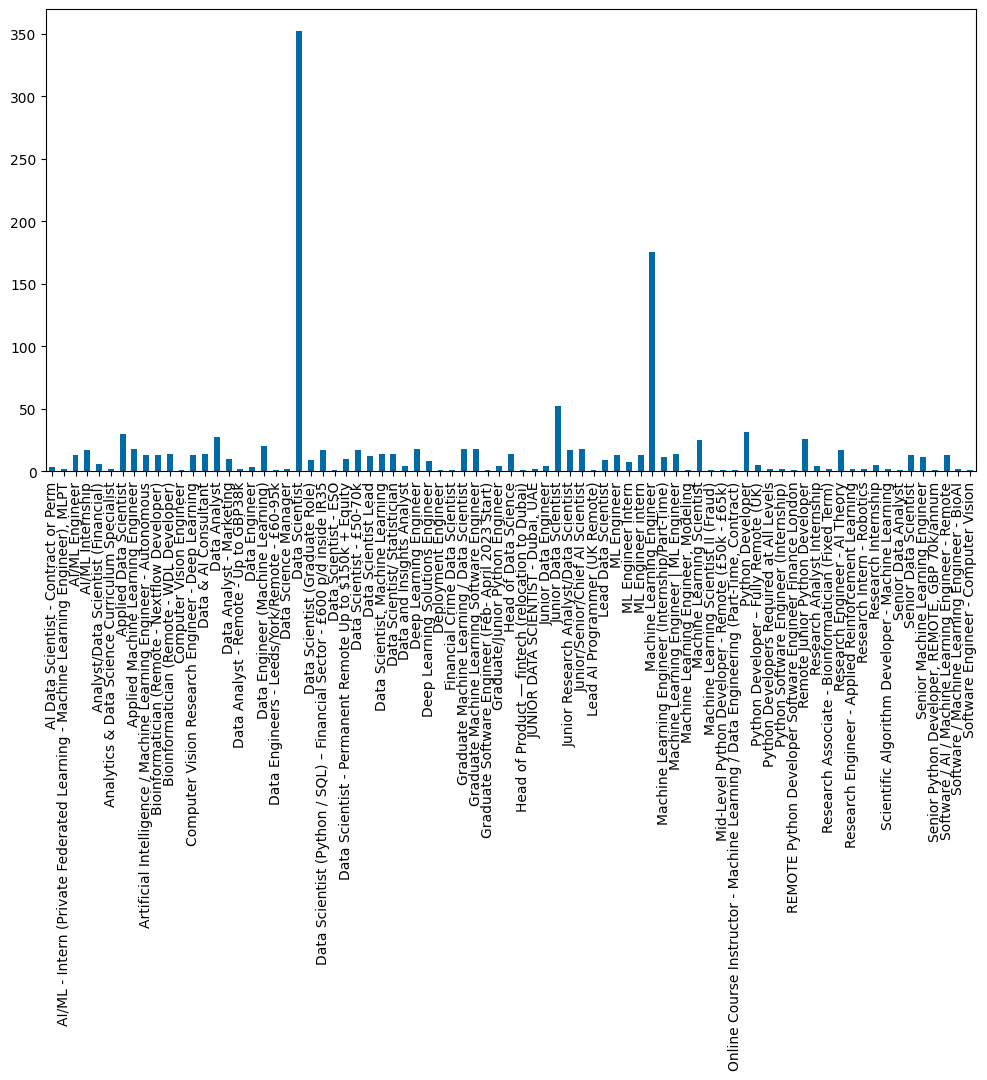

In [15]:
%store

df['title'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [16]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['description'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud


In [18]:
"""%store

plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(12, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()"""

"%store\n\nplt.figure(figsize=(32, 28))\n\nfor i, category in enumerate(categories):\n    wc = wordcloud(df_categories[i])\n\n    plt.subplot(12, 5, i + 1).set_title(category)\n    plt.imshow(wc)\n    plt.axis('off')\n    plt.plot()\n\nplt.show()\nplt.close()"

In [19]:
# Count the number of occurrences of each class in the "class" column
class_counts = df['title'].value_counts()

# Get a list of classes with less than 2 members
to_remove = class_counts[class_counts < 2].index.tolist()

# Remove rows with these classes from the DataFrame
df = df[~df['title'].isin(to_remove)]

# SKLEARN CANNOT HAVE CLASSES WITH LESS THAN 2 MEMBERS

In [20]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['title']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

/tmp/ipykernel_32373/443303149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


In [21]:
df

,title,company,description,onsite_remote,salary,location,posted_date,link,Seniority level,Employment type,Job function,Industries,normalized_job_title
0,36,Oscar Technology,role junior data scientistlocation manchester ...,onsite,NaN,"Manchester, England, United Kingdom",2023-02-28,https://uk.linkedin.com/jobs/view/junior-data-...,Entry level,Full-time,Engineering and Information Technology,Staffing and Recruiting,scientist
1,30,Cambridge Consultants,introductionwe looking talented mathematicians...,onsite,NaN,"Cambridge, England, United Kingdom",2023-02-27,https://uk.linkedin.com/jobs/view/graduate-mac...,Entry level,Full-time,Engineering and Information Technology,Design Services,scientist
2,43,orbit,machine learning engineer digital media servic...,onsite,NaN,"Leeds, England, United Kingdom",2023-02-07,https://uk.linkedin.com/jobs/view/machine-lear...,Not Applicable,Full-time,Information Technology,"Technology, Information and Internet",engineer
3,28,Predictiva,please note currently unable provide visa spon...,onsite,NaN,"Edinburgh, Scotland, United Kingdom",2023-03-06,https://uk.linkedin.com/jobs/view/deep-learnin...,NaN,Full-time,NaN,NaN,NaN
4,19,Peak,opportunityour mission change way world works ...,onsite,NaN,"Manchester, England, United Kingdom",2023-03-01,https://uk.linkedin.com/jobs/view/data-scienti...,Entry level,Full-time,Engineering and Information Technology,"Technology, Information and Internet",scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,13,Media by Kantar,kantar world leading data insights consulting ...,hybrid,NaN,"England, United Kingdom",2023-02-28,https://uk.linkedin.com/jobs/view/data-analyst...,Mid-Senior level,Full-time,"Consulting, Research, and Marketing",Market Research,NaN
1262,43,CellVoyant,cellvoyant biotechnology company predicts stem...,hybrid,NaN,"Bristol, England, United Kingdom",2022-11-10,https://uk.linkedin.com/jobs/view/machine-lear...,Entry level,Full-time,Engineering and Information Technology,Biotechnology,engineer
1263,19,Peak,opportunity mission change way world works dem...,hybrid,NaN,"Manchester Area, United Kingdom",2023-03-02,https://uk.linkedin.com/jobs/view/data-scienti...,Mid-Senior level,Full-time,"Information Technology, Other, and Engineering",IT Services and IT Consulting and Software Dev...,scientist
1264,27,PHMG,role data insights analystlocation old traffor...,hybrid,NaN,"Manchester, England, United Kingdom",2023-03-01,https://uk.linkedin.com/jobs/view/data-and-ins...,Entry level,Full-time,"Research, Analyst, and Information Technology","Advertising Services, Musicians, and Telecommu...",NaN


In [22]:
df.title.value_counts()

19    352
43    175
36     52
47     31
6      30
     ... 
1       2
55      2
62      2
58      2
18      2
Name: title, Length: 63, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['description'].values
requiredTarget = df['title'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [24]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(1000, 5064)
(250, 5064)


In [25]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.57
Accuracy of KNeighbors Classifier on test set:     0.53


In [26]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         1
           6       1.00      0.83      0.91         6
           7       1.00      0.50      0.67         4
           8       1.00      0.67      0.80         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         3
          12       0.00      0.00      0.00         3
          13       1.00      0.40      0.57         5
          14       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         1
          17       0.80      1.00      0.89         4
          19       0.39      0.97      0.

/home/kalamari/miniconda3/envs/pytorch-gpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kalamari/miniconda3/envs/pytorch-gpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kalamari/miniconda3/envs/pytorch-gpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 